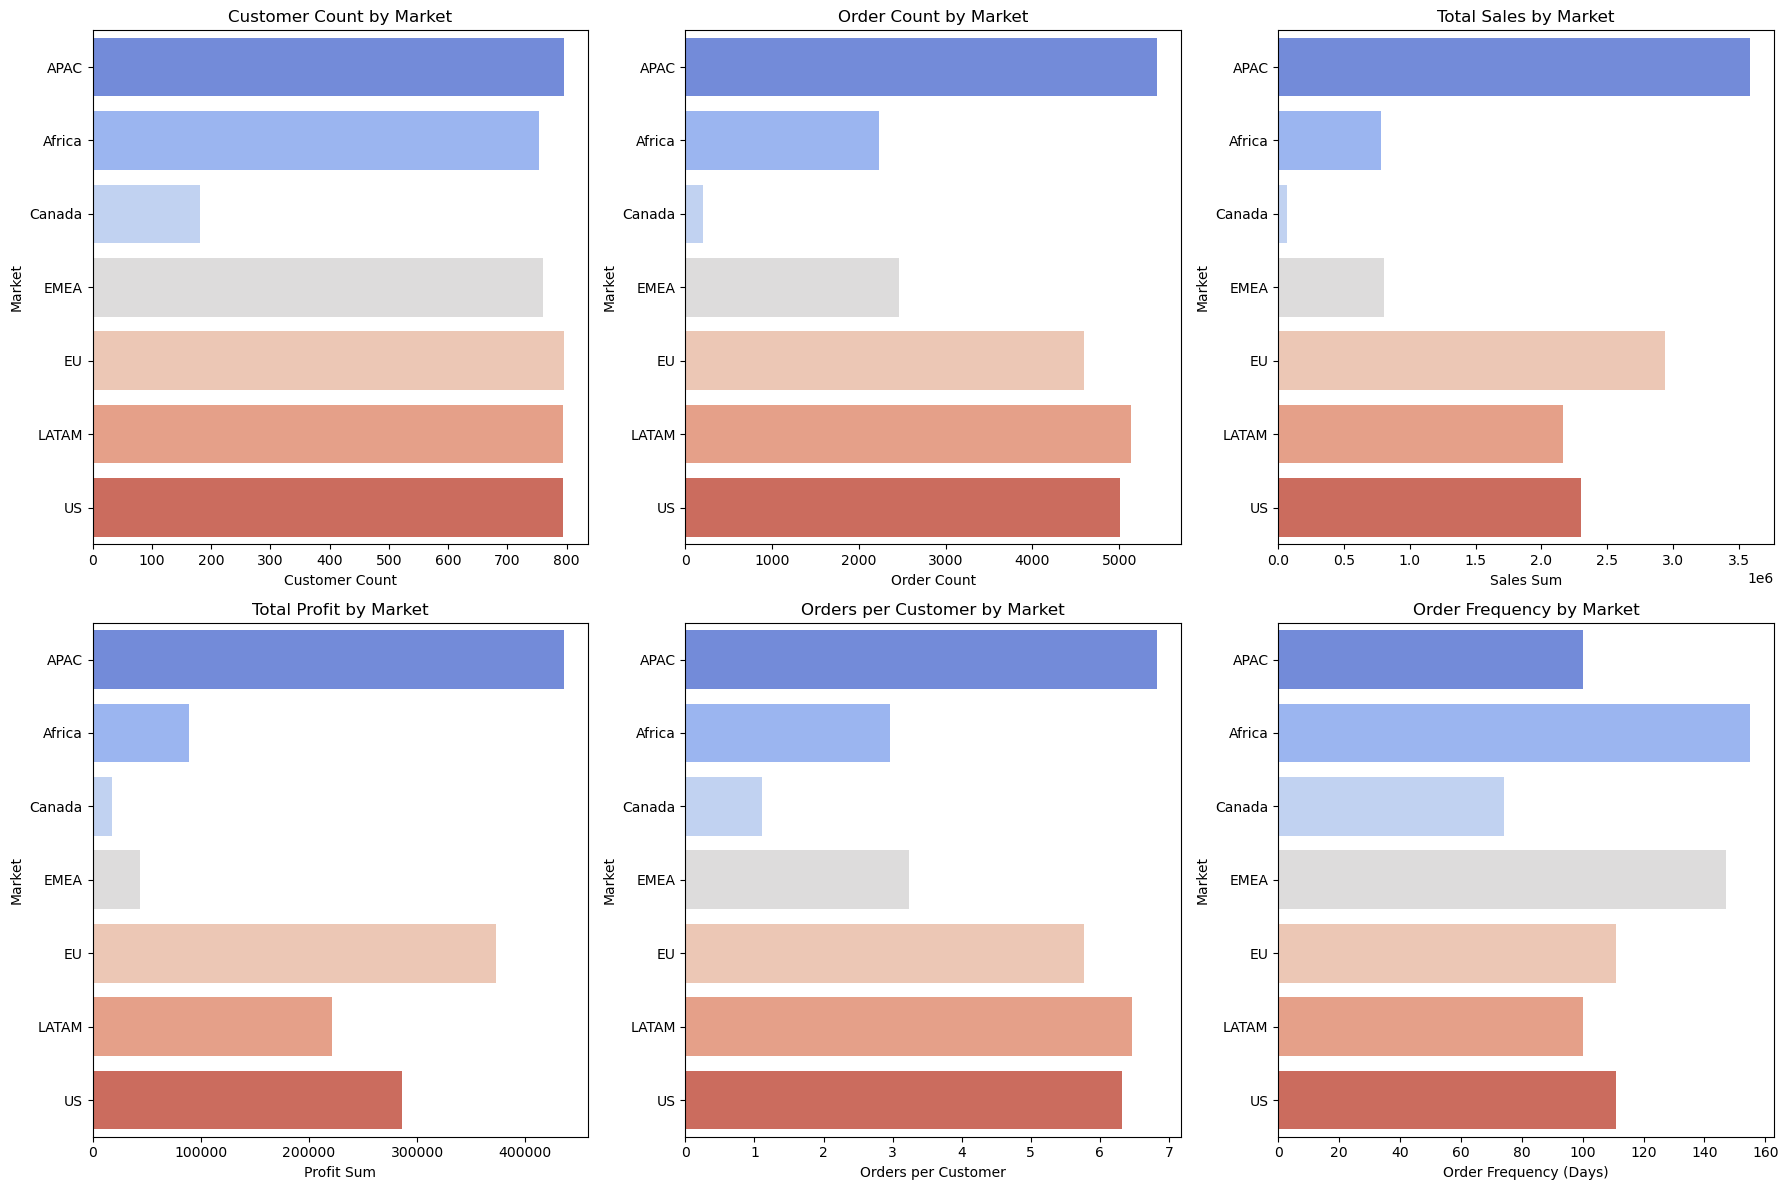

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


df = pd.read_csv('superstore.csv')
df_copy = df[['Market', 'Country', 'City', 'Category', 'Sub.Category', 'Sales', 'Quantity', 'Discount', 'Profit','Order.Date','Customer.ID','Order.ID']].copy()

# 대륙별 고객 수, 주문 수, 이익액, 매출액
customer_count = df_copy.groupby('Market')['Customer.ID'].nunique().reset_index()
customer_count.rename(columns={'Customer.ID': 'Customer Count'}, inplace=True)

order_count = df_copy.groupby('Market')['Order.ID'].nunique().reset_index()
order_count.rename(columns={'Order.ID': 'Order Count'}, inplace=True)

profit_amount = df_copy.groupby('Market')['Profit'].sum().reset_index() 
profit_amount.rename(columns={'Profit': 'Profit Sum'}, inplace=True)

sales_amount = df_copy.groupby('Market')['Sales'].sum().reset_index()
sales_amount.rename(columns={'Sales': 'Sales Sum'}, inplace=True)

# 국가별 고객 지표 통합
market_stats = pd.merge(customer_count, order_count, on='Market')
market_stats = pd.merge(market_stats, sales_amount, on='Market')
market_stats = pd.merge(market_stats, profit_amount, on='Market')

# 인당 주문 횟수 계산 (Order Count / Customer Count)
market_stats['Orders per Customer'] = market_stats['Order Count'] / market_stats['Customer Count']

# 인당 매출액 계산 (Sales / Customer Count)
market_stats['Sales per Customer'] = market_stats['Sales Sum'] / market_stats['Customer Count']

# 인당 이익액 계산 (Profit  / Customer Count)
market_stats['Profit per Customer'] = market_stats['Profit Sum'] / market_stats['Customer Count']

# 매출액 1달러 당 이익
market_stats['Profit/Sales'] = market_stats['Profit Sum'] / market_stats['Sales Sum']

# 주문 주기 (평균 주문 간격) 계산
df_copy['Order.Date'] = pd.to_datetime(df_copy['Order.Date'])
order_intervals = df_copy.groupby(['Market', 'Customer.ID'])['Order.Date'].agg(['min', 'max', 'count'])
order_intervals['Order Frequency (Days)'] = (order_intervals['max'] - order_intervals['min']) / (order_intervals['count'] - 1)
order_intervals = order_intervals.groupby('Market')['Order Frequency (Days)'].mean().reset_index()
order_intervals['Order Frequency (Days)'] = order_intervals['Order Frequency (Days)'].dt.days

# 통합 데이터프레임 만들기
market_stats = pd.merge(market_stats, order_intervals, on='Market', how='left')

# 📊 시각화
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

sns.barplot(data=market_stats, x='Customer Count', y='Market', ax=axes[0, 0], palette='coolwarm')
axes[0, 0].set_title('Customer Count by Market')

sns.barplot(data=market_stats, x='Order Count', y='Market', ax=axes[0, 1], palette='coolwarm')
axes[0, 1].set_title('Order Count by Market')

sns.barplot(data=market_stats, x='Sales Sum', y='Market', ax=axes[0, 2], palette='coolwarm')
axes[0, 2].set_title('Total Sales by Market')

sns.barplot(data=market_stats, x='Profit Sum', y='Market', ax=axes[1, 0], palette='coolwarm')
axes[1, 0].set_title('Total Profit by Market')

sns.barplot(data=market_stats, x='Orders per Customer', y='Market', ax=axes[1, 1], palette='coolwarm')
axes[1, 1].set_title('Orders per Customer by Market')

sns.barplot(data=market_stats, x='Order Frequency (Days)', y='Market', ax=axes[1, 2], palette='coolwarm')
axes[1, 2].set_title('Order Frequency by Market')

plt.tight_layout()
plt.show()

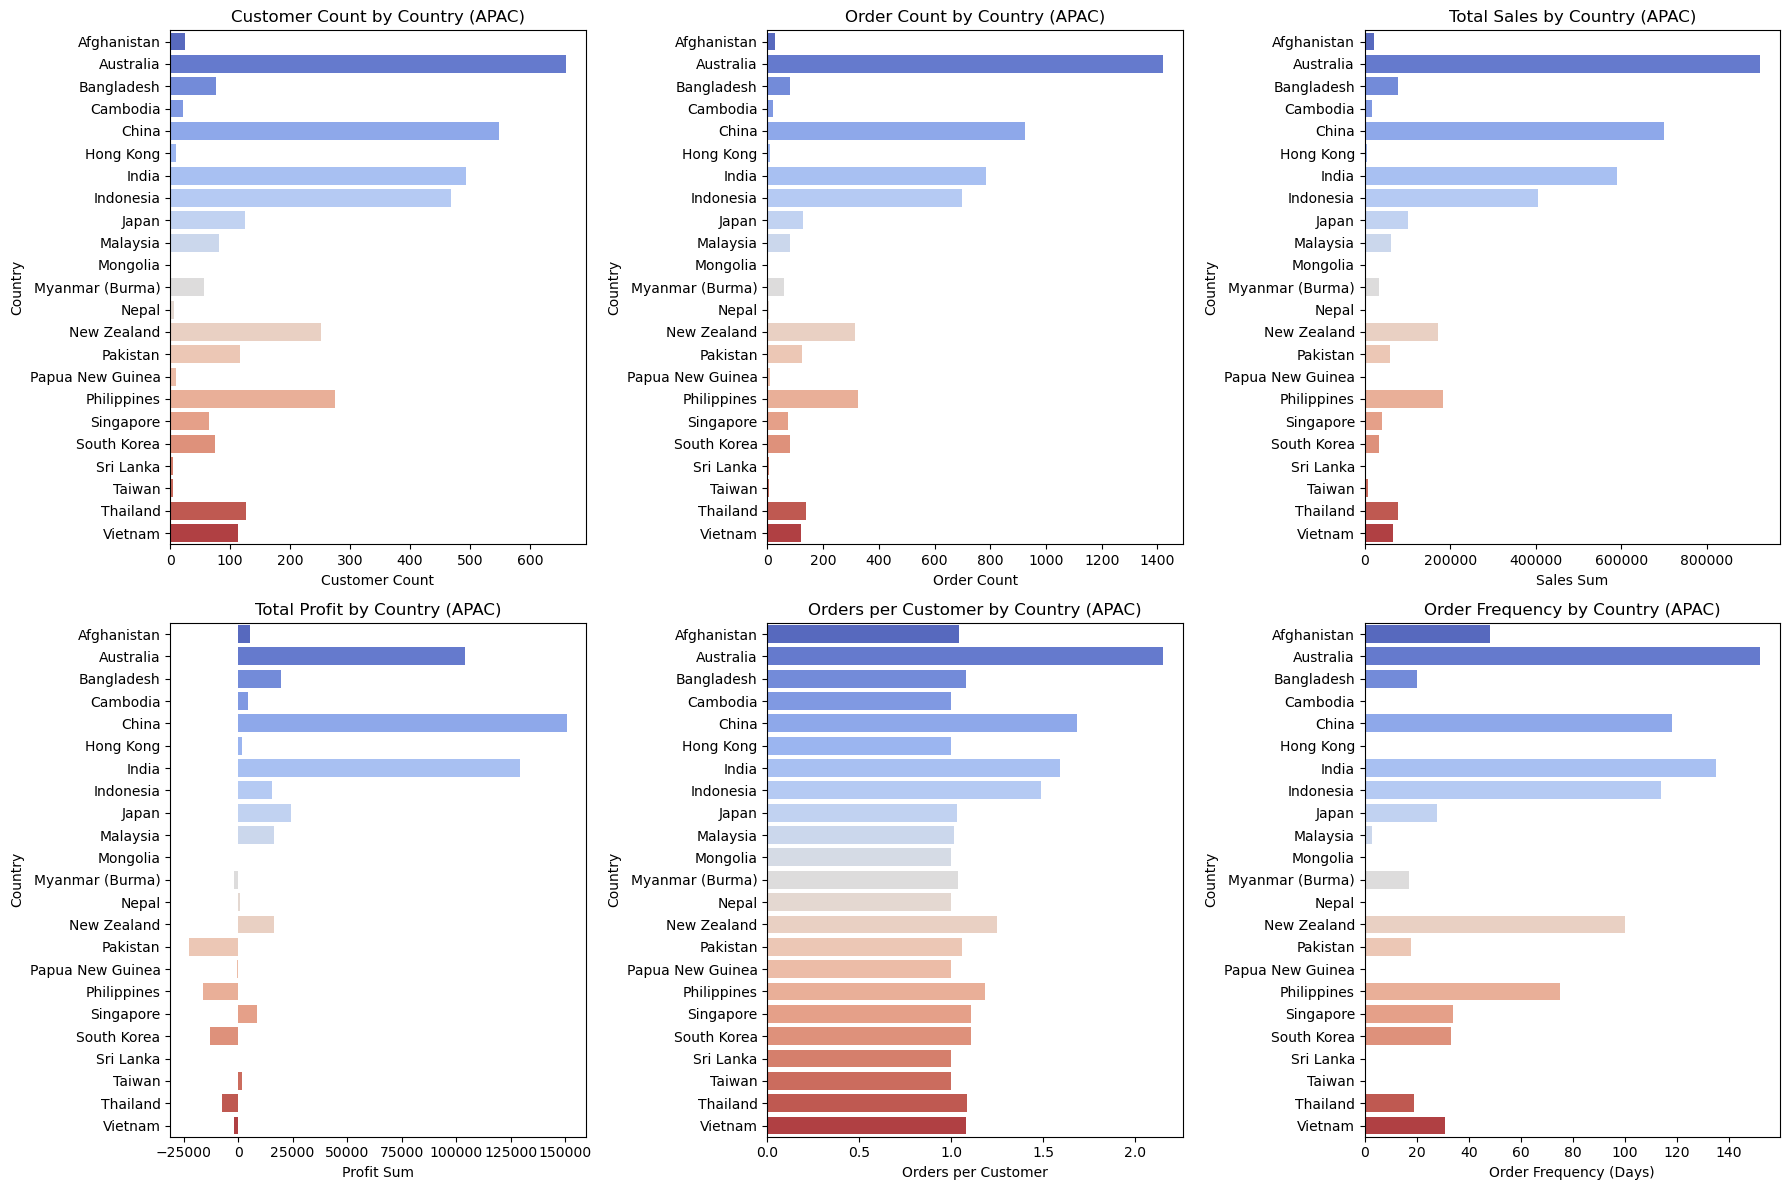

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

# APAC 지역 데이터 필터링
df = pd.read_csv('superstore.csv')
df_apac = df[df['Market'] == 'APAC'].copy()

# 대륙별 고객 수, 주문 수, 이익액, 매출액
customer_count = df_apac.groupby('Country')['Customer.ID'].nunique().reset_index()
customer_count.rename(columns={'Customer.ID': 'Customer Count'}, inplace=True)

order_count = df_apac.groupby('Country')['Order.ID'].nunique().reset_index()
order_count.rename(columns={'Order.ID': 'Order Count'}, inplace=True)

profit_amount = df_apac.groupby('Country')['Profit'].sum().reset_index() 
profit_amount.rename(columns={'Profit': 'Profit Sum'}, inplace=True)

sales_amount = df_apac.groupby('Country')['Sales'].sum().reset_index()
sales_amount.rename(columns={'Sales': 'Sales Sum'}, inplace=True)

# 국가별 고객 지표 통합
country_stats = pd.merge(customer_count, order_count, on='Country')
country_stats = pd.merge(country_stats, sales_amount, on='Country')
country_stats = pd.merge(country_stats, profit_amount, on='Country')

# 인당 주문 횟수 계산 (Order Count / Customer Count)
country_stats['Orders per Customer'] = country_stats['Order Count'] / country_stats['Customer Count']

# 인당 매출액 계산 (Sales / Customer Count)
country_stats['Sales per Customer'] = country_stats['Sales Sum'] / country_stats['Customer Count']

# 인당 이익액 계산 (Profit  / Customer Count)
country_stats['Profit per Customer'] = country_stats['Profit Sum'] / country_stats['Customer Count']

# 매출액 1달러 당 이익
country_stats['Profit/Sales'] = country_stats['Profit Sum'] / country_stats['Sales Sum']

# 주문 주기 (평균 주문 간격) 계산
df_apac['Order.Date'] = pd.to_datetime(df_apac['Order.Date'])
order_intervals = df_apac.groupby(['Country', 'Customer.ID'])['Order.Date'].agg(['min', 'max', 'count'])
order_intervals['Order Frequency (Days)'] = (order_intervals['max'] - order_intervals['min']) / (order_intervals['count'] - 1)
order_intervals = order_intervals.groupby('Country')['Order Frequency (Days)'].mean().reset_index()
order_intervals['Order Frequency (Days)'] = order_intervals['Order Frequency (Days)'].dt.days

# 통합 데이터프레임 만들기
country_stats = pd.merge(country_stats, order_intervals, on='Country', how='left')

# 📊 시각화
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

sns.barplot(data=country_stats, x='Customer Count', y='Country', ax=axes[0, 0], palette='coolwarm')
axes[0, 0].set_title('Customer Count by Country (APAC)')

sns.barplot(data=country_stats, x='Order Count', y='Country', ax=axes[0, 1], palette='coolwarm')
axes[0, 1].set_title('Order Count by Country (APAC)')

sns.barplot(data=country_stats, x='Sales Sum', y='Country', ax=axes[0, 2], palette='coolwarm')
axes[0, 2].set_title('Total Sales by Country (APAC)')

sns.barplot(data=country_stats, x='Profit Sum', y='Country', ax=axes[1, 0], palette='coolwarm')
axes[1, 0].set_title('Total Profit by Country (APAC)')

sns.barplot(data=country_stats, x='Orders per Customer', y='Country', ax=axes[1, 1], palette='coolwarm')
axes[1, 1].set_title('Orders per Customer by Country (APAC)')

sns.barplot(data=country_stats, x='Order Frequency (Days)', y='Country', ax=axes[1, 2], palette='coolwarm')
axes[1, 2].set_title('Order Frequency by Country (APAC)')

plt.tight_layout()
plt.show()


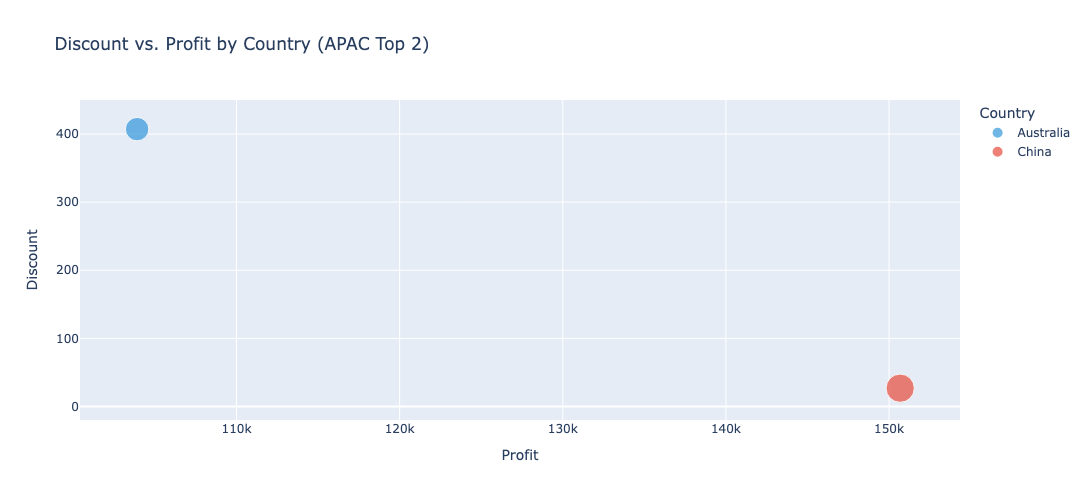

In [106]:
import pandas as pd
import plotly.express as px

# 데이터 불러오기
df = pd.read_csv('superstore.csv')
df_copy = df[['Year', 'Market', 'Country', 'Sales', 'Profit', 'Discount']].copy()

# APAC 데이터 필터링
apac_data = df_copy[df_copy['Market'] == 'APAC']

# 오스트레일리아와 중국만 선택 (올바른 방법)
aus_china = apac_data[apac_data['Country'].isin(['Australia', 'China'])]

# 그룹화하여 국가별 Sales, Profit 합계 계산
country_sales_profit_apac = aus_china.groupby('Country', as_index=False)[['Sales', 'Profit', 'Discount']].sum()

# 음수 Profit 값을 0으로 설정
country_sales_profit_apac['Profit'] = country_sales_profit_apac['Profit'].clip(lower=0)

# 시각화: Profit vs Discount (국가별 크기 비교)
fig = px.scatter(country_sales_profit_apac, x='Profit', y='Discount', color='Country', 
                 size='Profit', hover_data=['Discount'],color_discrete_map={'Australia': '#3498DB', 'China': '#E74C3C'},
                 title="Discount vs. Profit by Country (APAC Top 2)")

fig.update_layout(width=500, height=500, 
                  font=dict(size=12))  # 폰트 크기 조정

fig.show()


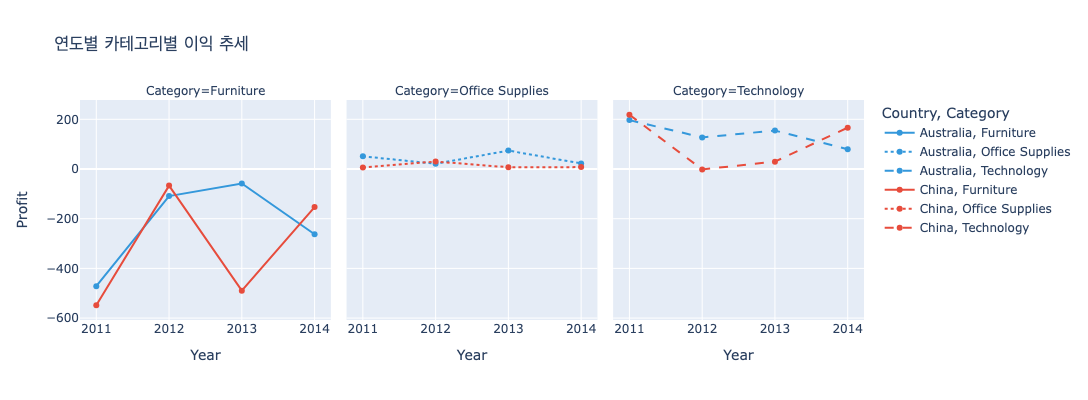

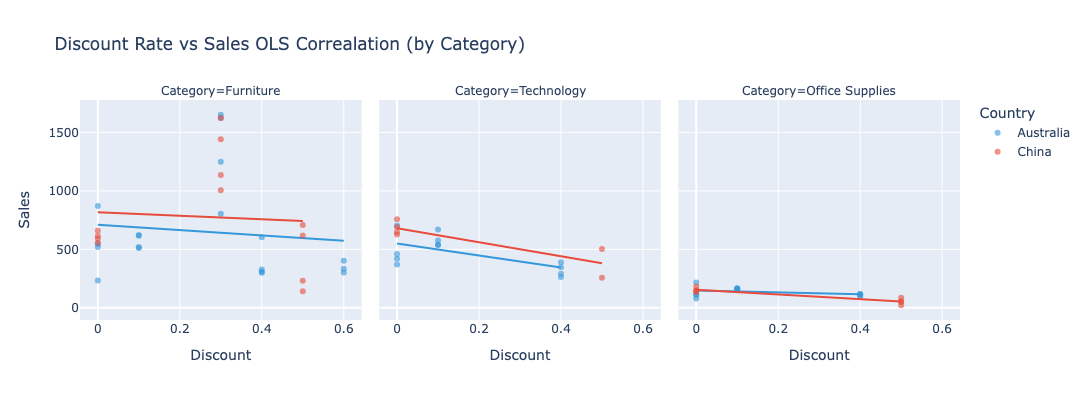

In [110]:
#호주, 중국 카테고리 연도별 이익 추세, 할인율 이익 상관관계 

# 1. 연도별 카테고리별 이익 추세를 라인 차트로 시각화

def plot_profit_trend():
    # 연도별, 국가별, 카테고리별 총 이익 계산
    profit_by_year = aus_china_sp.groupby(['Year', 'Country', 'Category'])['Profit'].sum().reset_index()
    
    fig = px.line(profit_by_year, 
                  x='Year', 
                  y='Profit', 
                  color='Country', 
                  line_dash='Category',
                  facet_col='Category',
                  markers=True,
                  title='연도별 카테고리별 이익 추세',
                  color_discrete_map={'Australia': '#3498DB', 'China': '#E74C3C'},
                  width=1000, height=400)
    
    return fig

# 2. 할인율과 이익의 상관관계를 산점도와 회귀선으로 시각화

def plot_discount_profit_correlation():
    fig = px.scatter(aus_china_sp, 
                     x='Discount', 
                     y='Sales', 
                     color='Country',
                     facet_col='Category',
                     opacity=0.6,
                     trendline='ols',
                     title='Discount Rate vs Sales OLS Correalation (by Category)',
                     color_discrete_map={'Australia': '#3498DB', 'China': '#E74C3C'},
                     width=1000, height=400)
    
    return fig

# 모든 시각화 함수를 실행
profit_trend = plot_profit_trend()
correlation_plot = plot_discount_profit_correlation()

# 결과 출력

# 각 시각화를 출력하려면 아래 주석을 해제하세요
profit_trend.show()
correlation_plot.show()

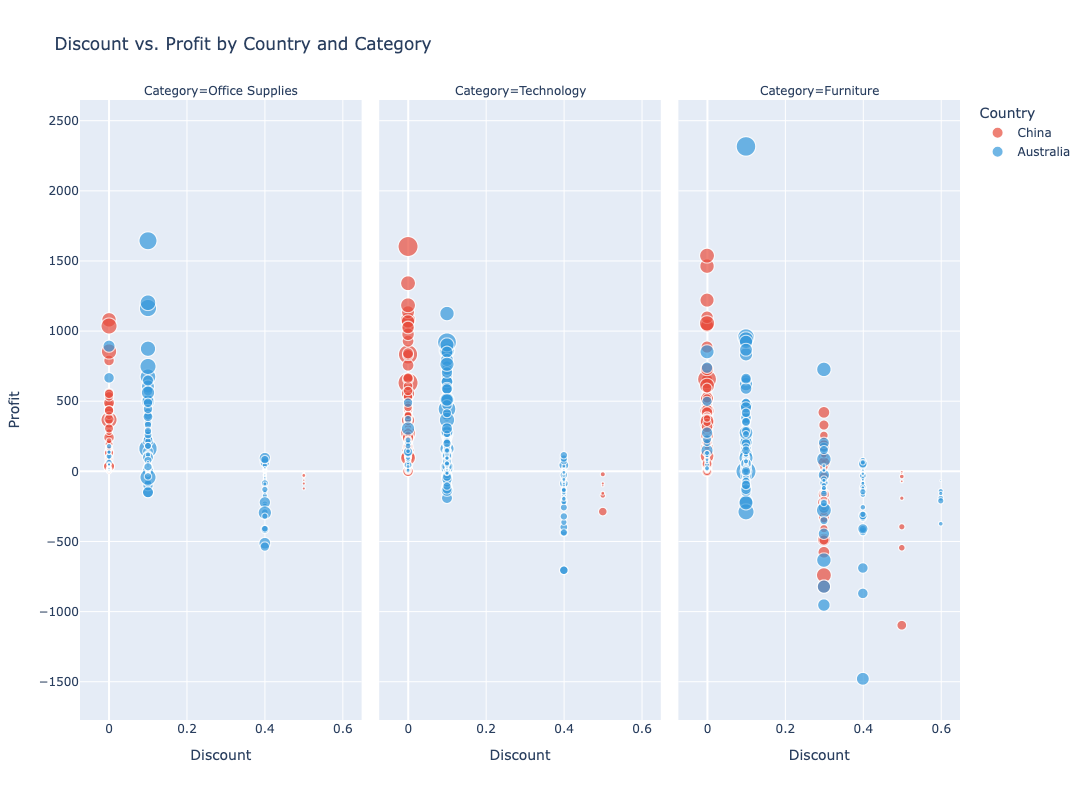

In [86]:
import plotly.express as px
import pandas as pd

# 데이터 불러오기 및 필터링
df = pd.read_csv('superstore.csv')
df_copy = df[['Country', 'Category', 'Sales', 'Discount', 'Quantity', 'Profit']].copy()
df_copy = df_copy[df_copy['Country'].isin(['Australia', 'China'])]  # 호주, 중국 필터링

# 색상 지정 (중국: 빨간색, 호주: 파란색)
color_map = {"China": "#E74C3C", "Australia": "#3498DB"}

# 산점도 생성
fig = px.scatter(df_copy, 
                 x="Discount", y="Profit", 
                 color="Country", 
                 size="Sales", 
                 facet_col="Category",  
                 title="Discount vs. Profit by Country and Category",
                 color_discrete_map=color_map)  # 색상 매핑 적용

# 그래프 크기 및 가독성 개선
fig.update_layout(width=1000, height=800, 
                  font=dict(size=12))  # 폰트 크기 조정

fig.show()

